<a href="https://colab.research.google.com/github/rashmi-22-stack/assignment/blob/main/co2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from google.colab import files
Data = files.upload()
print (Data)

Saving co2_emission.csv to co2_emission (1).csv
{'co2_emission.csv': b'Country,1990,2005,2017,2021\r\nWorld,22674.12,30049.81,37077.4,37857.58\r\nWorld \xe2\x80\x93 International Aviation,258.941,422.777,543.381,\r\nWorld \xe2\x80\x93 International Shipping,371.804,572.169,677.248,\r\nAfghanistan,2.546,1.063,11.422,8.35\r\nAlbania,6.583,4.196,5.026,4.59\r\nAlgeria,65.677,98.197,159.929,173\r\nAngola,5.851,15.975,30.876,24.45\r\nAnguilla,0.006,0.014,0.028,0.03\r\nAntigua and Barbuda,0.223,0.283,0.624,0.78\r\nArgentina,112.434,165.429,209.968,189\r\nArmenia,20.699,4.542,4.832,6.77\r\nAruba,0.297,0.47,0.959,1.27\r\nAustralia,275.408,391.59,402.253,367.91\r\nAustria,62.918,80.994,72.249,66.01\r\nAzerbaijan,58.077,30.485,32.544,37.11\r\nBahamas,1.524,2.068,2.997,4.04\r\nBahrain,11.988,23.388,35.775,37.49\r\nBangladesh,13.868,38.834,84.546,106.87\r\nBarbados,0.776,2.162,3.172,1.77\r\nBelarus,109.069,61.396,62.34,58.36\r\nBelgium,115.903,118.708,104.221,95.92\r\nBelize,0.188,0.44,0.44,0.64\r\

In [26]:
Data

{'co2_emission.csv': b'Country,1990,2005,2017,2021\r\nWorld,22674.12,30049.81,37077.4,37857.58\r\nWorld \xe2\x80\x93 International Aviation,258.941,422.777,543.381,\r\nWorld \xe2\x80\x93 International Shipping,371.804,572.169,677.248,\r\nAfghanistan,2.546,1.063,11.422,8.35\r\nAlbania,6.583,4.196,5.026,4.59\r\nAlgeria,65.677,98.197,159.929,173\r\nAngola,5.851,15.975,30.876,24.45\r\nAnguilla,0.006,0.014,0.028,0.03\r\nAntigua and Barbuda,0.223,0.283,0.624,0.78\r\nArgentina,112.434,165.429,209.968,189\r\nArmenia,20.699,4.542,4.832,6.77\r\nAruba,0.297,0.47,0.959,1.27\r\nAustralia,275.408,391.59,402.253,367.91\r\nAustria,62.918,80.994,72.249,66.01\r\nAzerbaijan,58.077,30.485,32.544,37.11\r\nBahamas,1.524,2.068,2.997,4.04\r\nBahrain,11.988,23.388,35.775,37.49\r\nBangladesh,13.868,38.834,84.546,106.87\r\nBarbados,0.776,2.162,3.172,1.77\r\nBelarus,109.069,61.396,62.34,58.36\r\nBelgium,115.903,118.708,104.221,95.92\r\nBelize,0.188,0.44,0.44,0.64\r\nBenin,0.415,2.839,7.097,8.63\r\nBermuda,0.335,0

In [30]:
import io
#df = pd.read_csv(git_hub.link)
df = pd.read_csv(io.BytesIO(Data['co2_emission.csv']))
print(df)

                            Country       1990       2005       2017      2021
0                             World  22674.120  30049.810  37077.400  37857.58
1    World – International Aviation    258.941    422.777    543.381       NaN
2    World – International Shipping    371.804    572.169    677.248       NaN
3                       Afghanistan      2.546      1.063     11.422      8.35
4                           Albania      6.583      4.196      5.026      4.59
..                              ...        ...        ...        ...       ...
207                         Vietnam     20.182     99.231    218.729    321.41
208                  Western Sahara      0.144      0.227      0.276      0.24
209                           Yemen      6.887     21.768     12.503     12.05
210                          Zambia      2.955      2.457      4.967      7.01
211                        Zimbabwe     17.178     11.388     12.087     12.29

[212 rows x 5 columns]


In [32]:
df.head()

,Country,1990,2005,2017,2021
0,World,22674.120,30049.810,37077.400,37857.58
1,World – International Aviation,258.941,422.777,543.381,NaN
2,World – International Shipping,371.804,572.169,677.248,NaN
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59


In [33]:
from ast import And
import pandas as pd
# multiIndex dataframe is df
# rRename the coloumns to convert df into non_multiindex data frame
df.coloumns =['Country', '1990', '2005', '2017', '2021']

#filter out the rows which are not countries
countries_df = df[df['Country'].str.startswith('World') == False ]
# Exclude the European Union (EU) as this is also not a country
countries_df = countries_df[countries_df['Country'] != 'European Union']
 # reset the index of Data Frame
countries_df.reset_index(drop=True, inplace=True)
print(countries_df)

            Country    1990    2005     2017    2021
0       Afghanistan   2.546   1.063   11.422    8.35
1           Albania   6.583   4.196    5.026    4.59
2           Algeria  65.677  98.197  159.929  173.00
3            Angola   5.851  15.975   30.876   24.45
4          Anguilla   0.006   0.014    0.028    0.03
..              ...     ...     ...      ...     ...
203         Vietnam  20.182  99.231  218.729  321.41
204  Western Sahara   0.144   0.227    0.276    0.24
205           Yemen   6.887  21.768   12.503   12.05
206          Zambia   2.955   2.457    4.967    7.01
207        Zimbabwe  17.178  11.388   12.087   12.29

[208 rows x 5 columns]


<ipython-input-33-0b2021744993>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coloumns =['Country', '1990', '2005', '2017', '2021']


In [34]:
countries_df

,Country,1990,2005,2017,2021
0,Afghanistan,2.546,1.063,11.422,8.35
1,Albania,6.583,4.196,5.026,4.59
2,Algeria,65.677,98.197,159.929,173.00
3,Angola,5.851,15.975,30.876,24.45
4,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
203,Vietnam,20.182,99.231,218.729,321.41
204,Western Sahara,0.144,0.227,0.276,0.24
205,Yemen,6.887,21.768,12.503,12.05
206,Zambia,2.955,2.457,4.967,7.01


                                          Country      1990      2005  \
39                                          China  2397.050  6263.060   
198                                 United States  5085.900  5971.570   
89                                          India   605.968  1210.750   
154                                        Russia  2378.920  1733.950   
98                                          Japan  1149.400  1276.860   
..                                            ...       ...       ...   
102                                      Kiribati     0.020     0.033   
64                               Falkland Islands     0.013     0.016   
4                                        Anguilla     0.006     0.014   
156  Saint Helena, Ascension and Tristan da Cunha     0.010     0.010   
65                                  Faroe Islands     0.001     0.002   

          2017       2021  
39   10877.220  12466.320  
198   5107.390   4752.080  
89    2454.770   2648.780  
154   1764.

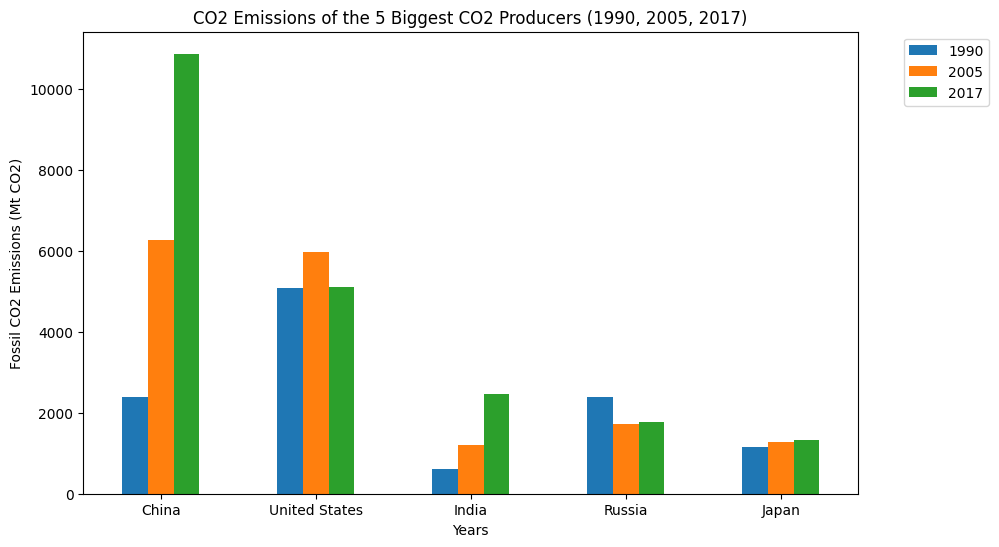

In [35]:
# Graph 1: CO2 of the bigger countries

import matplotlib.pyplot as plt

#sort the dataframe on the latest measurement in descending order
sorted_df = countries_df.sort_values(by='2021', ascending=False)
print(sorted_df)

# Select the top 5 rows
top_5_producers = sorted_df.head(5)
print(top_5_producers)

#creat dataframe  with col. for years 1990,2005,2017
years_df = top_5_producers[['Country', '1990', '2005', '2017']]
#print(years_df)
# Set the 'Country' column as the index
years_df.set_index('Country', inplace=True)

# # Plotting the graph
years_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Years')
plt.ylabel('Fossil CO2 Emissions (Mt CO2)')
plt.title('CO2 Emissions of the 5 Biggest CO2 Producers (1990, 2005, 2017)')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




<ipython-input-53-d52d750ede5d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Relative Change'] = (filtered_df['2021'] - filtered_df['1990']) / filtered_df['1990'] * 100


        Country     1990     2005     2017    2021
1       Albania    6.583    4.196    5.026    4.59
2       Algeria   65.677   98.197  159.929  173.00
3        Angola    5.851   15.975   30.876   24.45
6     Argentina  112.434  165.429  209.968  189.00
7       Armenia   20.699    4.542    4.832    6.77
..          ...      ...      ...      ...     ...
200  Uzbekistan  123.106  116.386   95.350  125.65
202   Venezuela  109.268  152.464  145.877  104.67
203     Vietnam   20.182   99.231  218.729  321.41
205       Yemen    6.887   21.768   12.503   12.05
207    Zimbabwe   17.178   11.388   12.087   12.29

[104 rows x 5 columns]
        Country      1990      2005       2017      2021  Relative Change
195     Ukraine   783.210   354.429    205.723    185.46       -76.320527
124     Moldova    31.957     8.139      8.263      9.55       -70.116094
7       Armenia    20.699     4.542      4.832      6.77       -67.293106
72      Georgia    34.745     4.979     11.558     11.65       -66.4

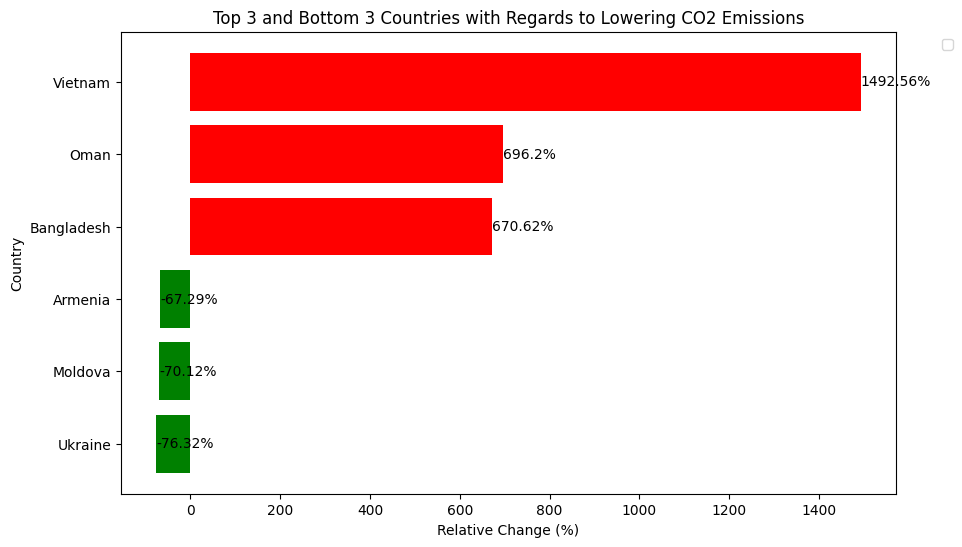

In [53]:
#Graph 2 :worst and best changers
# part1: Finding the top three and bottom three countries with regards to lowering these emissions and ploting their results.
import matplotlib.pyplot as plt

# Filter out countries with less than five Mt of CO2 emissions in 1990
filtered_df = countries_df[countries_df['1990'] >= 5]
print(filtered_df)
# Calculate the relative change in CO2 emissions
filtered_df['Relative Change'] = (filtered_df['2021'] - filtered_df['1990']) / filtered_df['1990'] * 100

# Sort the DataFrame based on the relative change in ascending order
sorted_df = filtered_df.sort_values(by='Relative Change')
print(sorted_df)
# Select the top three and bottom three countries
top_countries = sorted_df.head(3)
bottom_countries = sorted_df.tail(3)

# Combine the top and bottom countries
selected_countries = pd.concat([top_countries, bottom_countries])
print(selected_countries)
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the graph in horizontal bar
plt.barh(selected_countries['Country'], selected_countries['Relative Change'], color=['green', 'green', 'green', 'red', 'red', 'red'])

# Add labels and title to the chart
plt.xlabel('Relative Change (%)')
plt.ylabel('Country')
plt.title('Top 3 and Bottom 3 Countries with Regards to Lowering CO2 Emissions')

# Display the data labels for each bar
for i, v in enumerate(selected_countries['Relative Change']):
    plt.text(v, i, str(round(v, 2)) + '%', color='black', va='center')

# Move the legend to the side of the graph
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


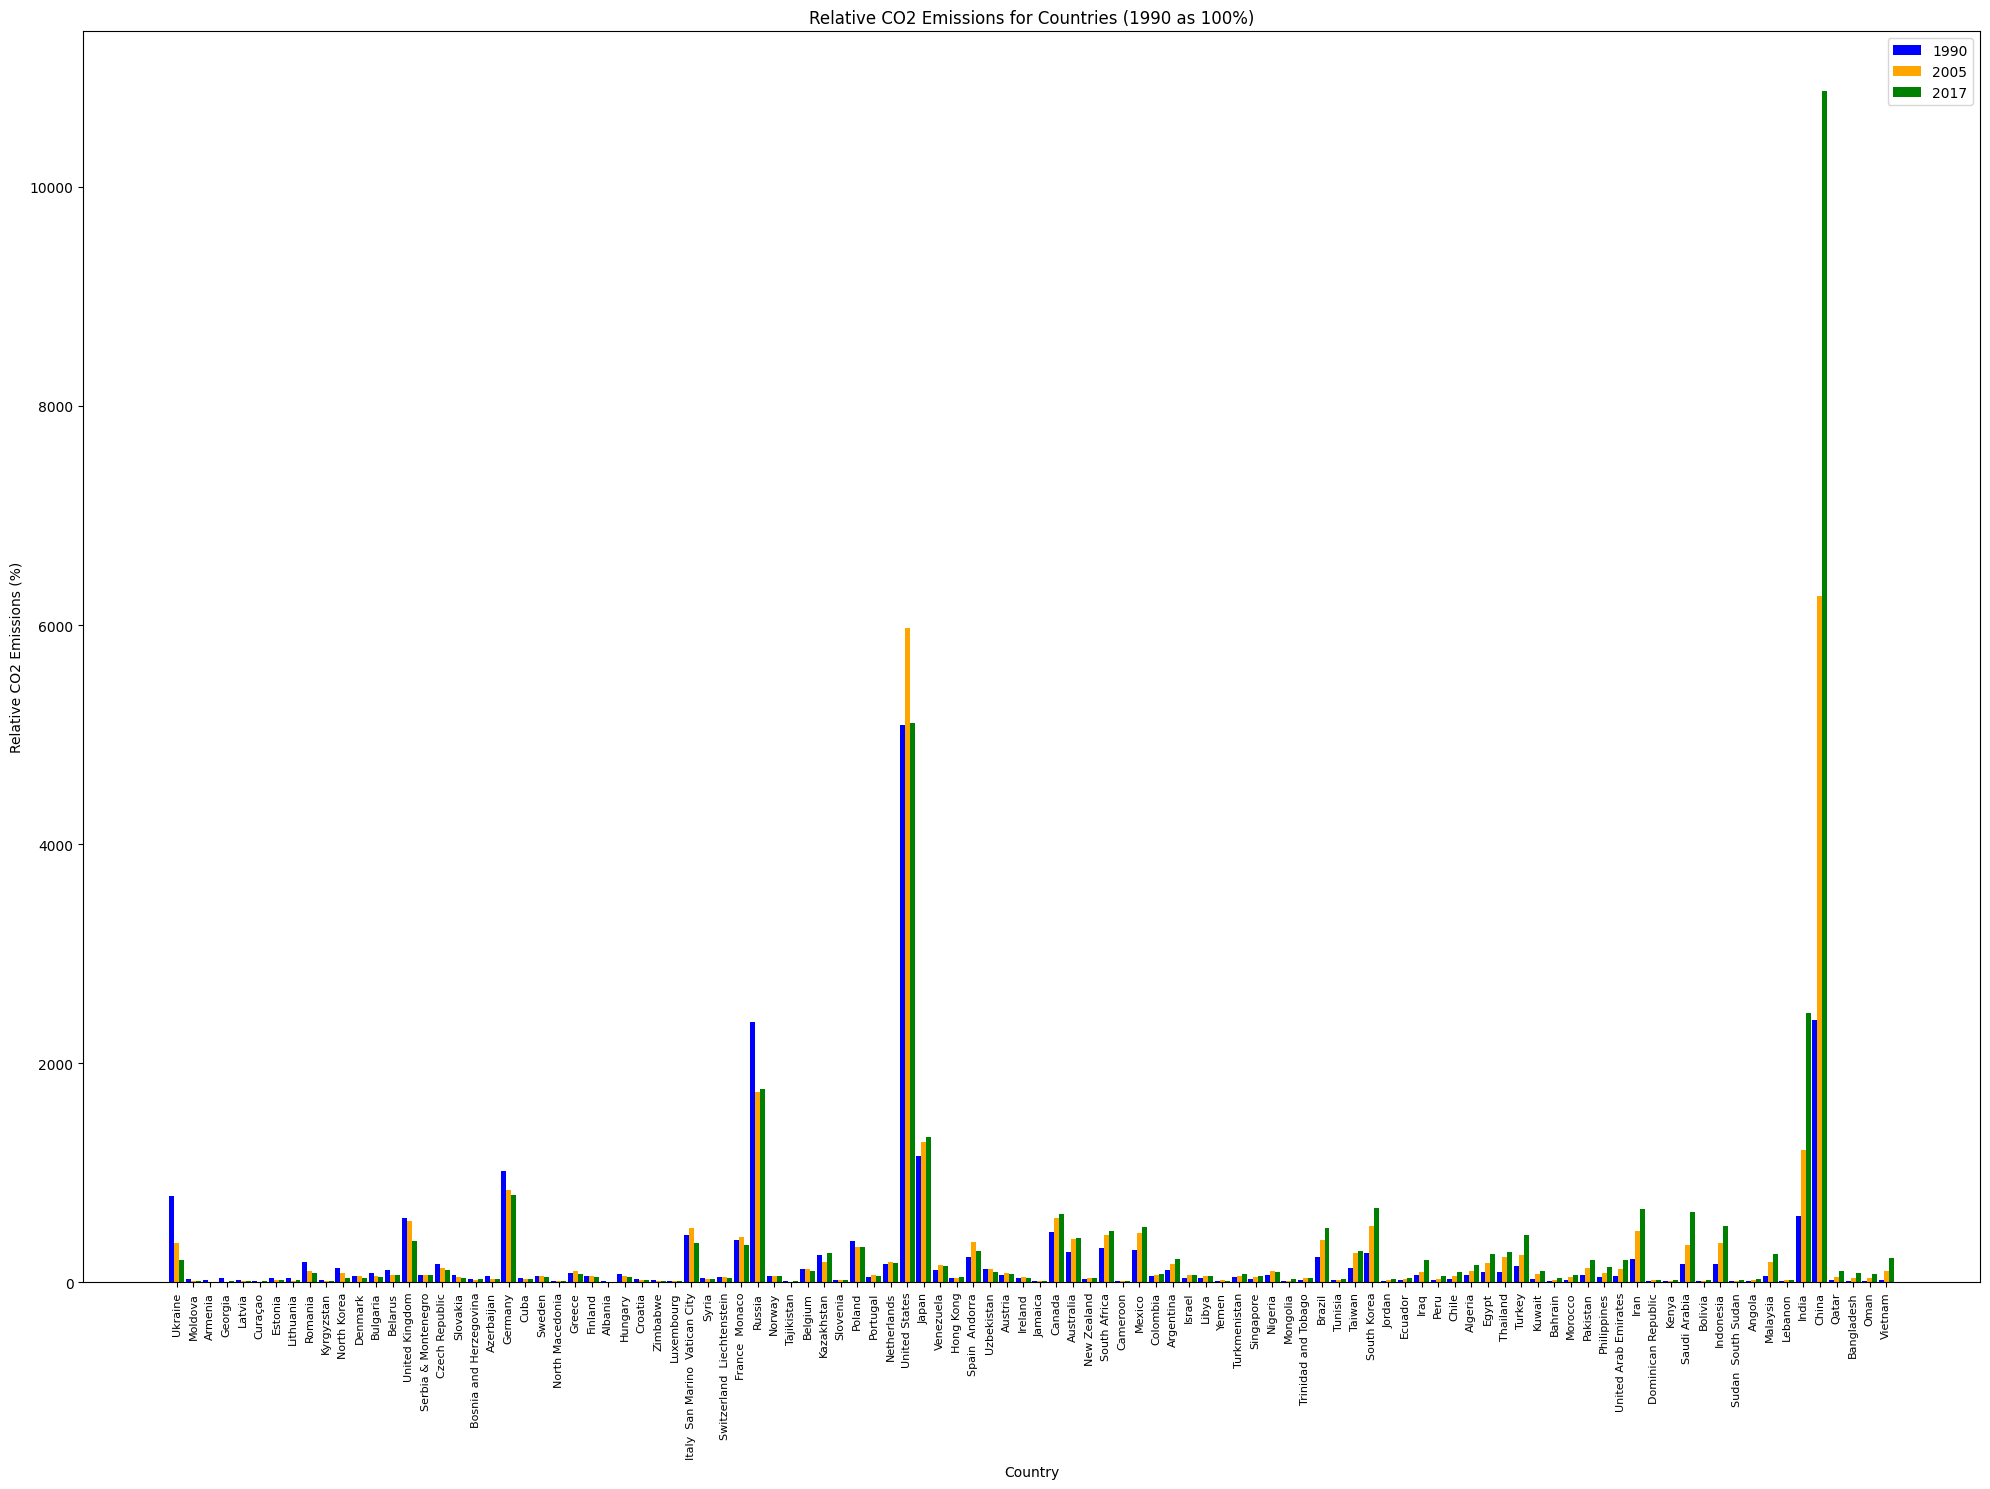

In [57]:
import matplotlib.pyplot as plt

# Sort the data by relative change in ascending order
sorted_df = filtered_df.sort_values('Relative Change', ascending=True)

# Set the x-axis labels
countries = sorted_df['Country']
x = range(len(countries))
years = ['1990', '2005', '2017']

# Prepare data for each year
relative_emissions_1990 = sorted_df['1990']
relative_emissions_2005 = sorted_df['2005']
relative_emissions_2017 = sorted_df['2017']

# Set the width of the bars
bar_width = 0.3

# Define colors for each year's bars
colors = ['blue', 'orange', 'green']

# Increase the size of the graph
plt.figure(figsize=(20, 15))  # Adjust the size according to your preference

# Plot the bars for each year with different colors( and modifying code to positioning the bars of years of each country next to each other using the x-coordinates,)
plt.bar(x, relative_emissions_1990, width=bar_width, label='1990', color=colors[0])
plt.bar([i + bar_width for i in x], relative_emissions_2005, width=bar_width, label='2005', color=colors[1])
plt.bar([i + 2 * bar_width for i in x], relative_emissions_2017, width=bar_width, label='2017', color=colors[2])

# Add labels and title to the chart
plt.xlabel('Country')
plt.ylabel('Relative CO2 Emissions (%)')
plt.title('Relative CO2 Emissions for Countries (1990 as 100%)')

# Set the x-axis ticks and labels
plt.xticks([i + bar_width for i in x], countries, rotation=90, fontsize=8)

# Add a legend
plt.legend()


# Display the chart
plt.tight_layout()
plt.show()

